# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone
###### by Harold Ricardo Restrepo

# Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">A description of the problem and a discussion of the background.</a>

2. <a href="#item2">A description of the data and how it will be used to solve the problem.</a>

3. <a href="#item3">This part consist in extract the data from the web and create a DataFrame.</a>
    
4. <a href="#item4">Getting the latitude and the longitude coordinates of each neighborhood (Localidad).</a> 
   
5. <a href="#item5">Exploring and clustering the neighborhoods in Bogotá (Localidad).</a> 

</font>
</div>

<a id='item1'></a>

### 1. A description of the problem and a discussion of the background.

Bogotá, the capital of Colombia, is a city with more than 10 million habitants, it is the main economic center of the country. It is the Colombian city with the largest number of foreign companies, one of the factors that position it as the largest labor market in its country. Bogotá is the largest business platform in Colombia, with 21% of the companies registered in the country, and additionally, 67% of Colombian high-impact enterprises are located in the city. Bogotá one of the five most attractive Latin American capitals to invest
In spite of being a very populated capital, it is one of the few in the world that for the amount of habitants it has not a massive transport like the subway. Until this year 2020 begins the first works. That is why in the medium term economic growth is planned at all levels.
This is why the problem posed is to identify which are the areas in which there are more businesses, which have been the most popular and which areas are in which there are more opportunities to open a business.

<a id='item2'></a>

### 2.	A description of the data and how it will be used to solve the problem

To perform this analysis, the following main sources of data are available:
- Wikipedia, where we will get the locations in which the city is divided. Bogota is divided in 20 "Localidades". For each "Localidad" we will obtain the postal codes of https://es.wikipedia.org/wiki/Anex:Bogot%C3%A1_Localities.
- Then we will get the geographic coordinates using geopy.
- With the previous data, we started the search of the different venues, the top venues categories in the different areas using the Foursquare API.
- ML tools will also be used as clustering to support the conclusions.
- Finally, we have the tools and data to start with the analysis.

#### What type of clients or a group of people would be interested in this project?

This project may interest tourism agencies, tourists themselves, both business and leisure, although the focus is that it serves potential investors as an alternative for expanding their businesses.

Additionally, it serves as an example for data science analyzes to focus on these developing countries.

<a id='item3'></a>

## 3. This part consist in extract the data from the web and create a DataFrame

Before we get the data and start exploring it, let's download all the dependencies that we will need.

In [1]:
# Now I install all what we need
!conda install -c anaconda beautifulsoup4 -y
print("BeautifulSoup installed")
!conda install -c conda-forge geocoder -y
print("Geocoder installed")
!conda install -c conda-forge geopy --yes 
print("Geopy installed")

# importing necessary libraries

from bs4 import BeautifulSoup
import requests

import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library


from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
print()
print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - beautifulsoup4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    numpy-base-1.15.4          |   py36h81de0dd_0         4.2 MB  anaconda
    numpy-1.15.4               |   py36h1d66e8a_0          35 KB  anaconda
    beautifulsoup4-4.8.1       |           py36_0         153 KB  anaconda
    openssl-1.1.1              |       h7b6447c_0         5.0 MB  anaconda
    soupsieve-1.9.5            |           py36_0          61 KB  anaconda
    mkl_fft-1.0.6              |   py36h7dd41cf_0         150 KB  anaconda
    certifi-2019.11.28         |           py36_0         156 KB  an

No I am using the Notebook to build the code to scrape the following Wikipedia page, https://es.wikipedia.org/wiki/Anexo:Localidades_de_Bogot%C3%A1, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe

<font size = 4>Extracting raw table (from wikipedia)</font>

In [2]:
# getting data from internet

bogota_localidades = 'https://es.wikipedia.org/wiki/Anexo:Localidades_de_Bogot%C3%A1'
# toronto_pcodes_link='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
pcodes= requests.get(bogota_localidades).text

# using beautiful soup to parse the HTML/XML codes.
#soup = BeautifulSoup(pcodes, 'html.parser')
#tables = soup.find('table', class_ = "sortable wikitable jquery-tablesorter")

In [3]:
soup = BeautifulSoup(pcodes, 'html.parser')
tables = soup.find('table', class_ = "sortable wikitable")
# print(tables.prettify())

Now, I proceed to obtain the column names:

In [4]:
titulos =[]
for i in tables.find('tr').find_all('th'):
    enc = i.text
    titulos.append(enc.strip())  

The dataframe consists of the following columns:

In [5]:
print(titulos)

['Nº', 'Localidad', 'Códigos Postales', 'Superficie km²[2]\u200b', 'Población[3]\u200b', 'Densidad hab/km²']


The main columns that we are going to use are "Localidad", "Códigos Postales" y "Densidad hab/km²".

Now I extract all data of the table

In [20]:
datos = []
for tr in tables.find_all('tr'):
    celda=[]
    for td in tr.find_all('td'):
        celda.append(td.text.strip().split('-')[0])
    datos.append(celda)

    # Let's append titulos and datos
df = pd.DataFrame(datos, columns=titulos)

In [21]:
df.head()

,Nº,Localidad,Códigos Postales,Superficie km²[2]​,Población[3]​,Densidad hab/km²
0,None,None,None,None,None,None
1,01,Usaquén,110111,65.31,501 999,7 686.4
2,02,Chapinero,110211,38.15,139 701,3 661.88
3,03,Santa Fe,110311,45.17,110 048,2 436.3
4,04,San Cristóbal,110411,49.09,404 697,8 243.98


Cleaning Data: Only process the cells that we need and ignore cells with null or NA values.

In [22]:
df=df[~df["Localidad"].isnull()]

In [23]:
df = df.drop(['Nº','Superficie km²[2]\u200b', 'Población[3]\u200b'],axis=1)
df

,Localidad,Códigos Postales,Densidad hab/km²
1,Usaquén,110111,7 686.4
2,Chapinero,110211,3 661.88
3,Santa Fe,110311,2 436.3
4,San Cristóbal,110411,8 243.98
5,Usme,110511,2 126.39
6,Tunjuelito,110611,20 124.11
7,Bosa,110711,28 126.91
8,Kennedy,110811,28 205.31
9,Fontibón,110911,11 858.41
10,Engativá,111011,24 723.52


Now, filtering the columns we need

In [24]:
df.rename(columns={'Códigos Postales':'Poscode'},inplace=True)

#### The Final Data Frame is:

In [25]:
df

,Localidad,Poscode,Densidad hab/km²
1,Usaquén,110111,7 686.4
2,Chapinero,110211,3 661.88
3,Santa Fe,110311,2 436.3
4,San Cristóbal,110411,8 243.98
5,Usme,110511,2 126.39
6,Tunjuelito,110611,20 124.11
7,Bosa,110711,28 126.91
8,Kennedy,110811,28 205.31
9,Fontibón,110911,11 858.41
10,Engativá,111011,24 723.52


In the last cell, use the .shape method to print the number of rows of your dataframe.

In [26]:
print('The DataFrame shape is', df.shape)

The DataFrame shape is (20, 3)


<a id='item4'></a>

# 4. Getting the latitude and the longitude coordinates of each neighborhood (Localidad)

In this section, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood.

First, it is necessary to install the geocoder package

I am going to use the Google Maps Geocoding API to get the latitude and the longitude coordinates of each neighborhood.

We need to extract the Postal Codes of the Data Frame we are working.

In [27]:
postal_codes=df.Poscode.unique()
print(postal_codes)

['110111' '110211' '110311' '110411' '110511' '110611' '110711' '110811'
 '110911' '111011' '111111' '111211' '111311' '111411' '111511' '111611'
 '111711' '111811' '111911' '112011']


Obtaining the latitude and the longitude coordinates of each neighborhood.

In [28]:
import geocoder
lat = []
long = []
cod_post = []
for i in range(len(postal_codes)):
    codigoPostal = postal_codes[i]
    g = geocoder.arcgis('{}, Bogota, Colombia'.format(codigoPostal))
    #print("Latitud: ", g.latlng[0], " Longitud: ", g.latlng[1], " del codigo Postal: ", codigoPostal)
    lat.append(g.latlng[0])
    long.append(g.latlng[1])
    cod_post.append(codigoPostal)

Now, converting the lists in a DataFrame to merge with the DataFrame which we are working.

In [29]:
list_of_tuples = list(zip(cod_post, lat, long))
coord_df = pd.DataFrame(list_of_tuples, columns = ['CodigoPostal','Latitud','Longitud'])
print('The coordinates dataframe shape is', coord_df.shape)
coord_df.head()

The coordinates dataframe shape is (20, 3)


,CodigoPostal,Latitud,Longitud
0,110111,4.691000,-74.033448
1,110211,4.667800,-74.025910
2,110311,4.590255,-74.025630
3,110411,4.560310,-74.053523
4,110511,4.496341,-74.130810


Now, we need to add the the latitude and the longitude coordinates to the initial DataFrame, a join is performed.

In [30]:
final_coord_df = df.join(coord_df.set_index('CodigoPostal'), on='Poscode')
final_coord_df.head()

,Localidad,Poscode,Densidad hab/km²,Latitud,Longitud
1,Usaquén,110111,7 686.4,4.691000,-74.033448
2,Chapinero,110211,3 661.88,4.667800,-74.025910
3,Santa Fe,110311,2 436.3,4.590255,-74.025630
4,San Cristóbal,110411,8 243.98,4.560310,-74.053523
5,Usme,110511,2 126.39,4.496341,-74.130810


In [78]:
final_coord_df

,Localidad,Poscode,Densidad hab/km²,Latitud,Longitud
1,Usaquén,110111,7 686.4,4.691000,-74.033448
2,Chapinero,110211,3 661.88,4.667800,-74.025910
3,Santa Fe,110311,2 436.3,4.590255,-74.025630
4,San Cristóbal,110411,8 243.98,4.560310,-74.053523
5,Usme,110511,2 126.39,4.496341,-74.130810
6,Tunjuelito,110611,20 124.11,4.584725,-74.141170
7,Bosa,110711,28 126.91,4.638727,-74.189920
8,Kennedy,110811,28 205.31,4.652555,-74.155299
9,Fontibón,110911,11 858.41,4.695895,-74.144576
10,Engativá,111011,24 723.52,4.724539,-74.115505


<a id='item5'></a>

# 5. Exploring and clustering the neighborhoods in Bogotá.

In this section, we are going to explore and cluster the neighborhoods in Bogotá. I decided to work with all boroughs in Bogota. I have replicated the same analysis that was did to the Toronto City data.

Let's get the geographical coordinates of Bogotá.

In [31]:
address = 'Bogota, Colombia'

geolocator = Nominatim(user_agent="bogota_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bogota, Colombia are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bogota, Colombia are 4.59808, -74.0760439.


As it was done with all of Toronto City, let's visualizat Bogota the localidades in it.

In [32]:
# create map of Bogota using latitude and longitude values
map_bogota = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(final_coord_df['Latitud'], final_coord_df['Longitud'], final_coord_df['Localidad']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bogota)  
    
map_bogota

#### Define Foursquare Credentials and Version

In [33]:
CLIENT_ID = 'JBGTDT3QZIXEXL0IRFUT5JZHIXET5LMVK5F15FP5CONCKDSE' # your Foursquare ID
CLIENT_SECRET = 'A0PHQAW3VAMDJ2O3R5AK1SNOBI00PTAHLXPO5KRQUESJSSZM' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JBGTDT3QZIXEXL0IRFUT5JZHIXET5LMVK5F15FP5CONCKDSE
CLIENT_SECRET:A0PHQAW3VAMDJ2O3R5AK1SNOBI00PTAHLXPO5KRQUESJSSZM


#### I have decided to explore all Bogotá's neighbourhoods.

#### Now, let's get the top 500 venues that are in Bogotá within a radius of 1000 meters.

First, let's create the GET request URL. Name the URL as **url**.

In [34]:
LIMIT = 500 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url


'https://api.foursquare.com/v2/venues/explore?client_id=JBGTDT3QZIXEXL0IRFUT5JZHIXET5LMVK5F15FP5CONCKDSE&client_secret=A0PHQAW3VAMDJ2O3R5AK1SNOBI00PTAHLXPO5KRQUESJSSZM&ll=4.59808,-74.0760439&v=20180605&radius=1000&limit=500'

Now we send the GET request and examine the results

In [35]:
results = requests.get(url).json()
# results

From the Foursquare lab, we know that all the information is in the *items* key. Let's borrow the **get_category_type** function from the Foursquare lab.

In [36]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a *pandas* dataframe.

In [37]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Centro Cultural Gabriel García Márquez,Cultural Center,4.597694,-74.074285
1,Teatro Colón,Theater,4.596540,-74.074538
2,La Puerta de la Catedral,Latin American Restaurant,4.597848,-74.074611
3,La Puerta Falsa,Café,4.597977,-74.074878
4,Juan Valdez Café,Coffee Shop,4.597782,-74.074299


And how many venues were returned by Foursquare?

In [38]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


#### Let's use the function created in a Lab to repeat the same process to all the neighborhoods in Bogotá

In [39]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Localidad', 
                  'Localidad Latitude', 
                  'Localidad Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [40]:
print(nearby_venues)

                                         name                     categories  \
0      Centro Cultural Gabriel García Márquez                Cultural Center   
1                                Teatro Colón                        Theater   
2                    La Puerta de la Catedral      Latin American Restaurant   
3                             La Puerta Falsa                           Café   
4                            Juan Valdez Café                    Coffee Shop   
5     FCE Fondo de Cultura Económica Librería                      Bookstore   
6              Madre salon & cantina familiar        Comfort Food Restaurant   
7     Museo de Arte del Banco de la República                     Art Museum   
8                                Museo Botero                     Art Museum   
9                          Arte y Pasión Café                           Café   
10                          Hotel de la Opera                          Hotel   
11                             Casa de M

#### Now runing the code to run the above function on each neighborhood and create a new dataframe called *bogota_venues*.

In [41]:
bogota_venues = getNearbyVenues(names=final_coord_df['Localidad'],
                                   latitudes=final_coord_df['Latitud'],
                                   longitudes=final_coord_df['Longitud']
                                  )

Usaquén
Chapinero
Santa Fe
San Cristóbal
Usme
Tunjuelito
Bosa
Kennedy
Fontibón
Engativá
Suba
Barrios Unidos
Teusaquillo
Los Mártires
Antonio Nariño
Puente Aranda
La Candelaria
Rafael Uribe Uribe
Ciudad Bolívar
Sumapaz


#### Let's check the size of the resulting dataframe

In [42]:
print(bogota_venues.shape)
bogota_venues.head()

(602, 7)


,Localidad,Localidad Latitude,Localidad Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Usaquén,4.691,-74.033448,Hotel NH Collection Bogotá Hacienda Royal,4.691981,-74.031946,Hotel
1,Usaquén,4.691,-74.033448,W Bogotá Hotel,4.693273,-74.034641,Hotel
2,Usaquén,4.691,-74.033448,Hotel NH Collection Bogotá Teleport Royal,4.692047,-74.035487,Hotel
3,Usaquén,4.691,-74.033448,Juan Valdéz Café,4.692852,-74.032456,Coffee Shop
4,Usaquén,4.691,-74.033448,Bodytech Hacienda,4.692862,-74.032898,Gymnastics Gym


Let's check how many venues were returned for each neighborhood

In [43]:
bogota_venues_grouped_loc=bogota_venues.groupby('Localidad').count().sort_values('Venue', ascending=False).iloc[:,2]
bogota_venues_grouped_loc

Localidad
La Candelaria         100
Usaquén               100
Teusaquillo           100
Fontibón               59
Suba                   48
Barrios Unidos         42
Antonio Nariño         38
Los Mártires           30
Engativá               28
Puente Aranda          18
Chapinero               8
Kennedy                 7
Rafael Uribe Uribe      7
Ciudad Bolívar          7
Bosa                    5
Tunjuelito              4
Usme                    1
Name: Venue, dtype: int64

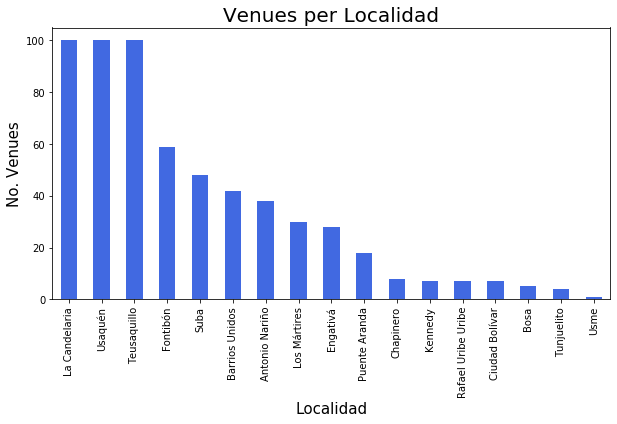

In [44]:
#clr = "dodgerblue"
clr = "royalblue"
bogota_venues_grouped_loc.plot.bar(figsize=(10,5), color=clr)
plt.title('Venues per Localidad', fontsize = 20)
plt.xlabel('Localidad', fontsize = 15)
plt.ylabel('No. Venues',fontsize = 15)
# Rotation of the bars names
plt.xticks(rotation=90)
plt.show()

In [45]:
bogota_venues_grouped_ven=bogota_venues.groupby('Venue Category').count().sort_values('Venue', ascending=False).iloc[:,2].head(30)
bogota_venues_grouped_ven

Venue Category
Café                         32
Restaurant                   32
Coffee Shop                  20
Italian Restaurant           18
Pizza Place                  17
Burger Joint                 16
Fast Food Restaurant         15
Latin American Restaurant    15
Park                         15
Shopping Mall                14
Bakery                       14
BBQ Joint                    13
Sandwich Place               13
Mexican Restaurant           12
Bar                          11
Airport Lounge               11
Hotel                        11
Seafood Restaurant           10
Breakfast Spot                8
Department Store              8
Pub                           8
South American Restaurant     8
Donut Shop                    7
French Restaurant             6
Fried Chicken Joint           6
Brewery                       6
Nightclub                     5
Steakhouse                    5
Juice Bar                     5
Dessert Shop                  5
Name: Localidad Longitude

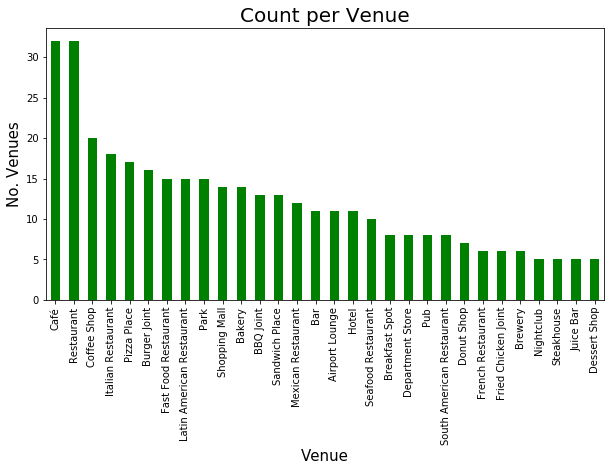

In [46]:
clr = "g"
bogota_venues_grouped_ven.plot.bar(figsize=(10,5), color=clr)
plt.title('Count per Venue', fontsize = 20)
plt.xlabel('Venue', fontsize = 15)
plt.ylabel('No. Venues',fontsize = 15)
# Rotation of the bars names
plt.xticks(rotation=90)
plt.show()

#### Let's find out how many unique categories can be curated from all the returned venues

In [47]:
print('There are {} uniques categories.'.format(len(bogota_venues['Venue Category'].unique())))

There are 159 uniques categories.


In [48]:
## Select info only for 5 relevant Localidades Chiyoda, Chuo, Shinjuku, Shibuya, Shinagawa. 
## 
pd.options.mode.chained_assignment = None
ward_list = ['La Candelaria', 'Teusaquillo', 'Engativá', 'Barrios Unidos', 'Santa Fe']
bogota_venues_selected = bogota_venues.loc[bogota_venues['Localidad'].isin(ward_list)]
bogota_venues_selected.index = np.arange(1, len(bogota_venues_selected) + 1)
#Ward_names = price_df_selected['Ward'].map(lambda y: str(y)[:-3]) # strip -Ku from the ward names
bogota_venues_selected['Localidad']=bogota_venues_selected['Localidad'].map(lambda y: str(y)[:]) 
#price_df_selected.drop(['Ward'], axis=1, inplace=True)
#price_df_selected['Ward']=Ward_names
bogota_venues_selected

,Localidad,Localidad Latitude,Localidad Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Engativá,4.724539,-74.115505,Avalon,4.724161,-74.114159,Bar
2,Engativá,4.724539,-74.115505,Pan del Carajo,4.722473,-74.118782,Bakery
3,Engativá,4.724539,-74.115505,Spinning Center,4.722602,-74.114627,Gym / Fitness Center
4,Engativá,4.724539,-74.115505,La Pizzeta,4.726569,-74.114211,Pizza Place
5,Engativá,4.724539,-74.115505,Colsubsidio Mini-Mercado,4.719371,-74.119273,Fruit & Vegetable Store
6,Engativá,4.724539,-74.115505,chorizos el chamo,4.717832,-74.111795,Fast Food Restaurant
7,Engativá,4.724539,-74.115505,Carulla Cortijo,4.725571,-74.121103,Food & Drink Shop
8,Engativá,4.724539,-74.115505,Juan Valdez Café,4.725093,-74.123855,Coffee Shop
9,Engativá,4.724539,-74.115505,Tranvia,4.718165,-74.111155,Restaurant
10,Engativá,4.724539,-74.115505,Oma Exito Occidente,4.721051,-74.122620,Café


### Analyzing Each Neighbourhood

In [49]:
# one hot encoding
bogota_onehot = pd.get_dummies(bogota_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bogota_onehot['Localidad'] = bogota_venues['Localidad'] 

# move neighborhood column to the first column
fixed_columns = [bogota_onehot.columns[-1]] + list(bogota_onehot.columns[:-1])
bogota_onehot = bogota_onehot[fixed_columns]

bogota_onehot.head()

,Localidad,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Garage,BBQ Joint,Baby Store,Bakery,Bar,Bed & Breakfast,Bike Rental / Bike Share,Bistro,Bookstore,Bowling Alley,Bowling Green,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Café,Campground,Caribbean Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Dog Run,Donut Shop,Drugstore,Duty-free Shop,Electronics Store,Event Space,Falafel Restaurant,Fast Food Restaurant,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gastropub,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Historic Site,History Museum,Hobby Shop,Hockey Field,Hostel,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Lake,Latin American Restaurant,Light Rail Station,Lounge,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moroccan Restaurant,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Music Venue,Neighborhood,New American Restaurant,Nightclub,Optical Shop,Paintball Field,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Pub,Public Art,Racetrack,Rental Service,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shop & Service,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Souvenir Shop,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Student Center,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Tea Room,Theater,Theme Restaurant,Toy / Game Store,Train Station,University,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Wings Joint,Women's Store
0,Usaquén,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Usaquén,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Usaquén,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Usaquén,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Usaquén,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.

In [50]:
bogota_onehot.shape

(602, 160)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [51]:
bogota_grouped = bogota_onehot.groupby('Localidad').mean().reset_index()
bogota_grouped

,Localidad,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Garage,BBQ Joint,Baby Store,Bakery,Bar,Bed & Breakfast,Bike Rental / Bike Share,Bistro,Bookstore,Bowling Alley,Bowling Green,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Café,Campground,Caribbean Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Dog Run,Donut Shop,Drugstore,Duty-free Shop,Electronics Store,Event Space,Falafel Restaurant,Fast Food Restaurant,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gastropub,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Historic Site,History Museum,Hobby Shop,Hockey Field,Hostel,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Lake,Latin American Restaurant,Light Rail Station,Lounge,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moroccan Restaurant,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Music Venue,Neighborhood,New American Restaurant,Nightclub,Optical Shop,Paintball Field,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Pub,Public Art,Racetrack,Rental Service,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shop & Service,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Souvenir Shop,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Student Center,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Tea Room,Theater,Theme Restaurant,Toy / Game Store,Train Station,University,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Wings Joint,Women's Store
0,Antonio Nariño,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00000,0.000000,0.052632,0.0,0.000000,0.026316,0.00,0.000000,0.000000,0.00,0.026316,0.000000,0.00,0.000000,0.00,0.026316,0.00,0.000000,0.000000,0.00,0.000000,0.052632,0.00,0.000000,0.00,0.00,0.00,0.052632,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.052632,0.00,0.000000,0.00,0.026316,0.026316,0.000000,0.000000,0.000000,0.00,0.026316,0.026316,0.00,0.026316,0.000000,0.000000,0.000000,0.000000,0.026316,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.026316,0.000000,0.000000,0.00,0.00,0.00,0.00000,0.00,0.026316,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.026316,0.026316,0.00,0.026316,0.0,0.000000,0.000000,0.00000,0.000000,0.00,0.000,0.00,0.000,0.026316,0.026316,0.00000,0.00,0.000000,0.000000,0.026316,0.052632,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.078947,0.026316,0.026316,0.052632,0.000,0.052632,0.000000,0.026316,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.00,0.000000,0.00000,0.026316,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.0
1,Barrios Unidos,0.000000,0.000000,0.000000,0.000000,0.023810,0.000000,0.00,0.000000,0.00,0.00,0.02381,0.000000,0.047619,0.0,0.023810,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.023810,0.00,0.023810,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.023810,0.000000,0.000000,0.000000,0.000000,0.00,0.047619,0.000000,0.00,0.000000,0.000000,0.023810,0.000000,0.000000,0.0

#### Let's confirm the new size

In [52]:
bogota_grouped.shape

(17, 160)

#### Let's print each neighborhood along with the top 5 most common venues

In [53]:
num_top_venues = 5

for hood in bogota_grouped['Localidad']:
    print("----"+hood+"----")
    temp = bogota_grouped[bogota_grouped['Localidad'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Antonio Nariño----
               venue  freq
0         Restaurant  0.08
1     Sandwich Place  0.05
2          BBQ Joint  0.05
3  Convenience Store  0.05
4   Department Store  0.05


----Barrios Unidos----
                       venue  freq
0  Latin American Restaurant  0.07
1                 Restaurant  0.07
2              Shopping Mall  0.05
3  South American Restaurant  0.05
4       Fast Food Restaurant  0.05


----Bosa----
           venue  freq
0  Women's Store   0.2
1  Movie Theater   0.2
2           Park   0.2
3  Shopping Mall   0.2
4     Baby Store   0.2


----Chapinero----
                       venue  freq
0             Scenic Lookout  0.12
1                Snack Place  0.12
2                 Restaurant  0.12
3  Latin American Restaurant  0.12
4                        Bar  0.12


----Ciudad Bolívar----
                    venue  freq
0          Ice Cream Shop  0.14
1             Tailor Shop  0.14
2             Pizza Place  0.14
3           Movie Theater  0.14
4  Furniture

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [54]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [55]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Localidad']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Localidad'] = bogota_grouped['Localidad']

for ind in np.arange(bogota_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bogota_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Localidad,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Antonio Nariño,Restaurant,Clothing Store,Convenience Store,Seafood Restaurant,Sandwich Place,Department Store,Pizza Place,BBQ Joint,Donut Shop,Burger Joint
1,Barrios Unidos,Latin American Restaurant,Restaurant,Shopping Mall,Mexican Restaurant,Sandwich Place,BBQ Joint,Fast Food Restaurant,South American Restaurant,Furniture / Home Store,Middle Eastern Restaurant
2,Bosa,Women's Store,Park,Shopping Mall,Baby Store,Movie Theater,Drugstore,Fast Food Restaurant,Falafel Restaurant,Event Space,Electronics Store
3,Chapinero,Latin American Restaurant,Paintball Field,Nightclub,Scenic Lookout,Bar,Restaurant,Snack Place,BBQ Joint,Women's Store,Falafel Restaurant
4,Ciudad Bolívar,Tailor Shop,Furniture / Home Store,Pizza Place,Pharmacy,Ice Cream Shop,Electronics Store,Movie Theater,Event Space,Duty-free Shop,Drugstore


## Cluster Neighborhoods

Let's run *k*-means to cluster the neighborhood into 5 clusters.

In [56]:
# set number of clusters
kclusters = 6

bogota_grouped_clustering = bogota_grouped.drop('Localidad', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bogota_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 3, 1, 5, 1, 1, 4, 1, 1], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [57]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

bogota_merged = final_coord_df

# merge bogota_grouped with bogota_data to add latitude/longitude for each neighborhood
bogota_merged = bogota_merged.join(neighborhoods_venues_sorted.set_index('Localidad'), on='Localidad')

bogota_merged.head() # check the last columns!

,Localidad,Poscode,Densidad hab/km²,Latitud,Longitud,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Usaquén,110111,7 686.4,4.691000,-74.033448,1.0,Coffee Shop,Italian Restaurant,Hotel,Café,Restaurant,Dessert Shop,Asian Restaurant,Park,Pizza Place,Burger Joint
2,Chapinero,110211,3 661.88,4.667800,-74.025910,1.0,Latin American Restaurant,Paintball Field,Nightclub,Scenic Lookout,Bar,Restaurant,Snack Place,BBQ Joint,Women's Store,Falafel Restaurant
3,Santa Fe,110311,2 436.3,4.590255,-74.025630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,San Cristóbal,110411,8 243.98,4.560310,-74.053523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Usme,110511,2 126.39,4.496341,-74.130810,0.0,Mountain,Women's Store,Hotel,Fish Market,Fast Food Restaurant,Falafel Restaurant,Event Space,Electronics Store,Duty-free Shop,Drugstore


Cleaning data

In [58]:
bogota_merged.dropna(inplace=True)
bogota_merged['Cluster Labels'] = bogota_merged['Cluster Labels'].astype(int)

In [59]:
bogota_merged.head()

,Localidad,Poscode,Densidad hab/km²,Latitud,Longitud,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Usaquén,110111,7 686.4,4.691000,-74.033448,1,Coffee Shop,Italian Restaurant,Hotel,Café,Restaurant,Dessert Shop,Asian Restaurant,Park,Pizza Place,Burger Joint
2,Chapinero,110211,3 661.88,4.667800,-74.025910,1,Latin American Restaurant,Paintball Field,Nightclub,Scenic Lookout,Bar,Restaurant,Snack Place,BBQ Joint,Women's Store,Falafel Restaurant
5,Usme,110511,2 126.39,4.496341,-74.130810,0,Mountain,Women's Store,Hotel,Fish Market,Fast Food Restaurant,Falafel Restaurant,Event Space,Electronics Store,Duty-free Shop,Drugstore
6,Tunjuelito,110611,20 124.11,4.584725,-74.141170,2,Pizza Place,Fast Food Restaurant,Bar,Café,Drugstore,Fish Market,Falafel Restaurant,Event Space,Electronics Store,Duty-free Shop
7,Bosa,110711,28 126.91,4.638727,-74.189920,3,Women's Store,Park,Shopping Mall,Baby Store,Movie Theater,Drugstore,Fast Food Restaurant,Falafel Restaurant,Event Space,Electronics Store


Finally, let's visualize the resulting clusters

In [60]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bogota_merged['Latitud'], bogota_merged['Longitud'], bogota_merged['Localidad'], bogota_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster.

#### Cluster 1

In [63]:
bogota_merged.loc[bogota_merged['Cluster Labels'] == 0, bogota_merged.columns[[1] + list(range(5, bogota_merged.shape[1]))]]

,Poscode,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,110511,0,Mountain,Women's Store,Hotel,Fish Market,Fast Food Restaurant,Falafel Restaurant,Event Space,Electronics Store,Duty-free Shop,Drugstore


#### Cluster 2

In [62]:
bogota_merged.loc[bogota_merged['Cluster Labels'] == 1, bogota_merged.columns[[1] + list(range(5, bogota_merged.shape[1]))]]

,Poscode,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,110111,1,Coffee Shop,Italian Restaurant,Hotel,Café,Restaurant,Dessert Shop,Asian Restaurant,Park,Pizza Place,Burger Joint
2,110211,1,Latin American Restaurant,Paintball Field,Nightclub,Scenic Lookout,Bar,Restaurant,Snack Place,BBQ Joint,Women's Store,Falafel Restaurant
9,110911,1,Airport Lounge,Café,Coffee Shop,Airport Terminal,Burger Joint,Fried Chicken Joint,Sandwich Place,Gift Shop,Pizza Place,Donut Shop
10,111011,1,Pizza Place,Department Store,Park,Restaurant,Fast Food Restaurant,Bakery,Smoke Shop,Café,Shop & Service,Shopping Mall
11,111111,1,Donut Shop,Park,Coffee Shop,Burger Joint,Market,Gym,Mexican Restaurant,Sandwich Place,Bakery,Lake
12,111211,1,Latin American Restaurant,Restaurant,Shopping Mall,Mexican Restaurant,Sandwich Place,BBQ Joint,Fast Food Restaurant,South American Restaurant,Furniture / Home Store,Middle Eastern Restaurant
13,111311,1,Restaurant,Café,Sandwich Place,Italian Restaurant,Brewery,Fast Food Restaurant,Bar,Bakery,Pizza Place,Latin American Restaurant
14,111411,1,Shopping Mall,Mobile Phone Shop,Department Store,Train Station,Restaurant,Clothing Store,Steakhouse,Shop & Service,Bowling Green,Mexican Restaurant
15,111511,1,Restaurant,Clothing Store,Convenience Store,Seafood Restaurant,Sandwich Place,Department Store,Pizza Place,BBQ Joint,Donut Shop,Burger Joint
16,111611,1,Restaurant,BBQ Joint,Diner,Pharmacy,Taco Place,Fast Food Restaurant,Soccer Field,Miscellaneous Shop,Salad Place,Bakery


#### Cluster 3

In [119]:
bogota_merged.loc[bogota_merged['Cluster Labels'] == 2, bogota_merged.columns[[1] + list(range(5, bogota_merged.shape[1]))]]

,Localidad,Densidad hab/km²,Latitud,Longitud,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Suba,12 117.27,4.823235,-74.057385,2,Burger Joint,Women's Store,Food,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Dog Run,Donut Shop


#### Cluster 4

In [120]:
bogota_merged.loc[bogota_merged['Cluster Labels'] == 3, bogota_merged.columns[[1] + list(range(5, bogota_merged.shape[1]))]]

,Localidad,Densidad hab/km²,Latitud,Longitud,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Bosa,28 126.91,4.603180,-74.190505,3,Park,Miscellaneous Shop,Restaurant,Shopping Mall,Movie Theater,Women's Store,Farmers Market,Falafel Restaurant,Electronics Store,Drugstore
8,Kennedy,28 205.31,4.637288,-74.175104,3,Arcade,Shopping Mall,Park,Movie Theater,History Museum,Historic Site,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop


#### Cluster 5

In [72]:
bogota_merged.loc[bogota_merged['Cluster Labels'] == 4, bogota_merged.columns[[1] + list(range(5, bogota_merged.shape[1]))]]

,Poscode,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,110811,4,BBQ Joint,Skating Rink,Shopping Mall,Park,Gym,Department Store,Fruit & Vegetable Store,Women's Store,Event Space,Electronics Store


In [71]:
bogota_merged

,Localidad,Poscode,Densidad hab/km²,Latitud,Longitud,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Usaquén,110111,7 686.4,4.691000,-74.033448,1,Coffee Shop,Italian Restaurant,Hotel,Café,Restaurant,Dessert Shop,Asian Restaurant,Park,Pizza Place,Burger Joint
2,Chapinero,110211,3 661.88,4.667800,-74.025910,1,Latin American Restaurant,Paintball Field,Nightclub,Scenic Lookout,Bar,Restaurant,Snack Place,BBQ Joint,Women's Store,Falafel Restaurant
5,Usme,110511,2 126.39,4.496341,-74.130810,0,Mountain,Women's Store,Hotel,Fish Market,Fast Food Restaurant,Falafel Restaurant,Event Space,Electronics Store,Duty-free Shop,Drugstore
6,Tunjuelito,110611,20 124.11,4.584725,-74.141170,2,Pizza Place,Fast Food Restaurant,Bar,Café,Drugstore,Fish Market,Falafel Restaurant,Event Space,Electronics Store,Duty-free Shop
7,Bosa,110711,28 126.91,4.638727,-74.189920,3,Women's Store,Park,Shopping Mall,Baby Store,Movie Theater,Drugstore,Fast Food Restaurant,Falafel Restaurant,Event Space,Electronics Store
8,Kennedy,110811,28 205.31,4.652555,-74.155299,4,BBQ Joint,Skating Rink,Shopping Mall,Park,Gym,Department Store,Fruit & Vegetable Store,Women's Store,Event Space,Electronics Store
9,Fontibón,110911,11 858.41,4.695895,-74.144576,1,Airport Lounge,Café,Coffee Shop,Airport Terminal,Burger Joint,Fried Chicken Joint,Sandwich Place,Gift Shop,Pizza Place,Donut Shop
10,Engativá,111011,24 723.52,4.724539,-74.115505,1,Pizza Place,Department Store,Park,Restaurant,Fast Food Restaurant,Bakery,Smoke Shop,Café,Shop & Service,Shopping Mall
11,Suba,111111,12 117.27,4.708096,-74.063170,1,Donut Shop,Park,Coffee Shop,Burger Joint,Market,Gym,Mexican Restaurant,Sandwich Place,Bakery,Lake
12,Barrios Unidos,111211,20 459.24,4.677830,-74.071605,1,Latin American Restaurant,Restaurant,Shopping Mall,Mexican Restaurant,Sandwich Place,BBQ Joint,Fast Food Restaurant,South American Restaurant,Furniture / Home Store,Middle Eastern Restaurant


#### Cluster 6

In [121]:
bogota_merged.loc[bogota_merged['Cluster Labels'] == 5, bogota_merged.columns[[1] + list(range(5, bogota_merged.shape[1]))]]

,Localidad,Densidad hab/km²,Latitud,Longitud,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Chapinero,3 661.88,4.632283,-74.045805,5,Plaza,Park,Gym,Women's Store,Donut Shop,Farmers Market,Falafel Restaurant,Electronics Store,Drugstore,Diner


#### Cluster 7

In [51]:
bogota_merged.loc[bogota_merged['Cluster Labels'] == 6, bogota_merged.columns[[1] + list(range(5, bogota_merged.shape[1]))]]

,Localidad,Densidad hab/km²,Latitud,Longitud,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


#### Cluster 8

In [52]:
bogota_merged.loc[bogota_merged['Cluster Labels'] == 7, bogota_merged.columns[[1] + list(range(5, bogota_merged.shape[1]))]]

,Localidad,Densidad hab/km²,Latitud,Longitud,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


A deeper analysis 

In [64]:
# Create a Data-Frame out of it to Concentrate Only on Restaurants 

bogota_Dist_Venues_only_restaurant = bogota_venues[bogota_venues['Venue Category']\
                                                          .str.contains('Coffee Shop')].reset_index(drop=True)
bogota_Dist_Venues_only_restaurant.index = np.arange(1, len(bogota_Dist_Venues_only_restaurant)+1)
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", bogota_Dist_Venues_only_restaurant.shape)
bogota_Dist_Venues_only_restaurant.head(3)

Shape of the Data-Frame with Venue Category only Restaurant:  (20, 7)


,Localidad,Localidad Latitude,Localidad Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Usaquén,4.691,-74.033448,Juan Valdéz Café,4.692852,-74.032456,Coffee Shop
2,Usaquén,4.691,-74.033448,Starbucks,4.692408,-74.034384,Coffee Shop
3,Usaquén,4.691,-74.033448,Starbucks,4.695327,-74.031175,Coffee Shop


In [68]:
## Show in Map the Top Rated Restaruants in the Top 5 Districts
map_restaurants = folium.Map(location=[latitude, longitude], zoom_start=11)
#map_restaurants = folium.Map(location=[latitude, longitude], zoom_start=11, tiles="openstreetmap", 
#                            attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the Venues based on the Major Districts
Districts = ['Usaquén','Chapinero', 'Santa Fe','San Cristóbal','Usme','Tunjuelito','Bosa','Kennedy','Fontibón','Engativá','Suba','Barrios Unidos','Teusaquillo','Los Mártires','Antonio Nariño','Puente Aranda','La Candelaria','Rafael Uribe Uribe','Ciudad Bolívar','Sumapaz']

# x = np.arange(len(Districts))

#rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to the map
# markers_colors = []
for lat, lon, poi, distr in zip(bogota_venues['Venue Latitude'], 
                                  bogota_venues['Venue Longitude'], 
                                  bogota_venues['Venue Category'], 
                                  bogota_venues['Localidad']):
    label = folium.Popup(str(poi) + ' ' + str(distr), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[cluster-1],
        #color=rainbow[Districts.index(distr)-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        #fill_color=rainbow[Districts.index(distr)-1],
        fill_opacity=0.3).add_to(map_restaurants)
       
map_restaurants

In [77]:
## Show in Map the Top Rated Restaruants in the Top 5 Districts

map_restaurants = folium.Map(location=[latitude, longitude], zoom_start=11, tiles="openstreetmap", 
                            attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the Venues based on the Major Districts
Districts = ['La Candelaria', 'Teusaquillo', 'Usaquén', 'Suba', 'Fontibón']

x = np.arange(len(Districts))

rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']

# add markers to the map
# markers_colors = []
for lat, lon, poi, distr in zip(bogota_venues_selected['Venue Latitude'], 
                                  bogota_venues_selected['Venue Longitude'], 
                                  bogota_venues_selected['Venue Category'], 
                                  bogota_venues_selected['Localidad']):
    label = folium.Popup(str(poi) + ' ' + str(distr), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[Districts.index(distr)-1],
        fill=True,
        fill_color=rainbow[Districts.index(distr)-1],
        fill_opacity=0.3).add_to(map_restaurants)
       
map_restaurants

In [76]:
ward_list = ['La Candelaria', 'Teusaquillo', 'Usaquén', 'Suba', 'Fontibón']
bogota_venues_selected = bogota_venues.loc[bogota_venues['Localidad'].isin(ward_list)]
bogota_venues_selected.index = np.arange(1, len(bogota_venues_selected) + 1)
#Ward_names = price_df_selected['Ward'].map(lambda y: str(y)[:-3]) # strip -Ku from the ward names
bogota_venues_selected['Localidad']=bogota_venues_selected['Localidad'].map(lambda y: str(y)[:]) 
#price_df_selected.drop(['Ward'], axis=1, inplace=True)
#price_df_selected['Ward']=Ward_names
bogota_venues_selected

,Localidad,Localidad Latitude,Localidad Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Usaquén,4.691000,-74.033448,Hotel NH Collection Bogotá Hacienda Royal,4.691981,-74.031946,Hotel
2,Usaquén,4.691000,-74.033448,W Bogotá Hotel,4.693273,-74.034641,Hotel
3,Usaquén,4.691000,-74.033448,Hotel NH Collection Bogotá Teleport Royal,4.692047,-74.035487,Hotel
4,Usaquén,4.691000,-74.033448,Juan Valdéz Café,4.692852,-74.032456,Coffee Shop
5,Usaquén,4.691000,-74.033448,Bodytech Hacienda,4.692862,-74.032898,Gymnastics Gym
6,Usaquén,4.691000,-74.033448,WeWork Usaquén,4.694304,-74.032745,Coworking Space
7,Usaquén,4.691000,-74.033448,Parque Publico Usaquén II,4.691297,-74.031994,Dog Run
8,Usaquén,4.691000,-74.033448,Juan Valdez Café,4.691830,-74.034097,Café
9,Usaquén,4.691000,-74.033448,Market Kitchen,4.693313,-74.034784,Restaurant
10,Usaquén,4.691000,-74.033448,Pedro Mandinga,4.694293,-74.031840,Bar
